Chapter 09

# QQ图
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码对鸢尾花数据集的四个特征进行一系列统计分析和可视化，具体包括概率密度函数 (PDF)、累积分布函数 (CDF)、逆累积分布函数 (ICDF) 的对比以及 QQ 图和 Z 分数的可视化。

1. **PDF 曲线比较**：代码计算每个特征的经验 PDF 和基于正态分布的 PDF。经验 PDF 使用直方图来近似，基于正态分布的 PDF 则是通过特征的均值和标准差生成。通过图表，分别用分步图和正态曲线展示这两种 PDF。

2. **CDF 曲线比较**：对于每个特征，代码生成经验 CDF（通过 ECDF）和正态 CDF。经验 CDF 是基于样本数据的累积分布，正态 CDF 是基于假设分布的累积分布。可视化中，用分步图和光滑曲线来表示经验 CDF 和正态 CDF。

3. **Copula 分布分析**：代码将四个特征的 ECDF 转换为 [0,1] 区间的概率值，形成一个 Copula 分布。然后，生成各特征对的散点图和等高线图，以观察它们之间的相关关系。

4. **ICDF 曲线**：代码通过 ICDF（逆累积分布）计算每个特征的分布下分位点和概率值的关系。正态 ICDF 生成基于假设分布的分位点值。图表中，用分步图和正态曲线显示经验 ICDF 和正态 ICDF 的对比。

5. **QQ 图**：代码生成每个特征的 QQ 图，比较样本分位数与标准正态分布的理论分位数，以判断样本数据的正态性。

6. **Z 分数生成**：通过每个特征的均值和标准差标准化数据，计算 Z 分数。这些 Z 分数的经验 PDF 与标准正态 PDF 进行对比。

这段代码使用 `Iris` 数据集来比较数据的经验分布（PDF、CDF）与参数分布（正态分布）的拟合情况。代码首先绘制每个特征的经验概率密度函数（PDF）和累积分布函数（CDF），然后通过Copula分析生成协同分布的散点图矩阵，并绘制经验逆累积分布（ICDF）和理论分布的Q-Q图，最后通过Z分数来对数据进行标准化，绘制各特征的标准化后分布。

### 正态分布的PDF和CDF公式
1. 概率密度函数 (PDF):
   $$
   f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

2. 累积分布函数 (CDF):
   $$
   F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x - \mu}{\sigma \sqrt{2}}\right) \right]
   $$

3. 逆累积分布函数 (ICDF):
   $$
   F^{-1}(p) = \mu + \sigma \cdot \Phi^{-1}(p)
   $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import scipy

## 准备数据

In [2]:
iris = load_iris()  # 加载 Iris 数据集

In [3]:
X = iris.data  # 提取特征数据
y = iris.target  # 提取标签

In [4]:
feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$', 'Petal length, $X_3$', 'Petal width, $X_4$']  # 特征名称
x_array = np.linspace(0, 8, 100)  # 创建 x 数组

In [5]:
# X_df = pd.DataFrame(X, columns=feature_names)  # 将特征数据转换为 DataFrame
# X_df.to_pickle('X_df.pkl')
X_df = pd.read_pickle('X_df.pkl')

## 比较 PDF 曲线

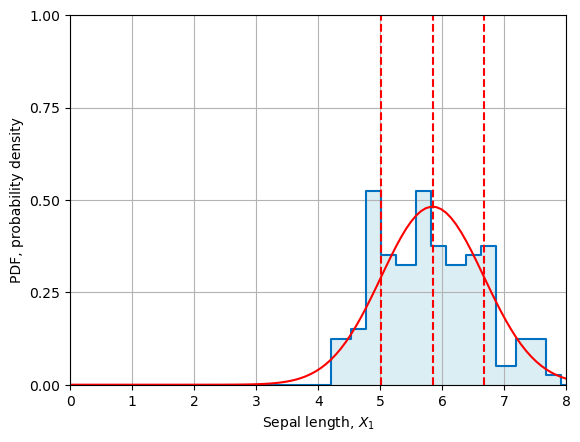

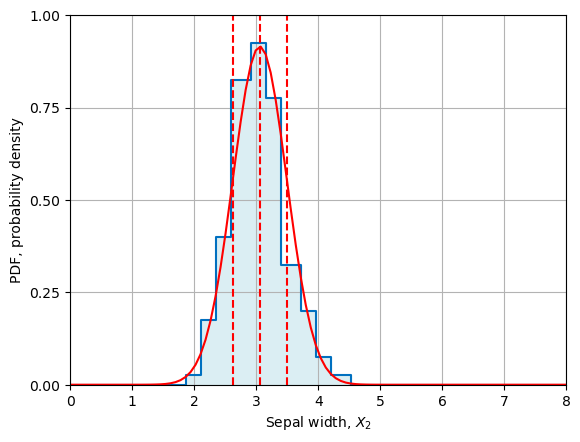

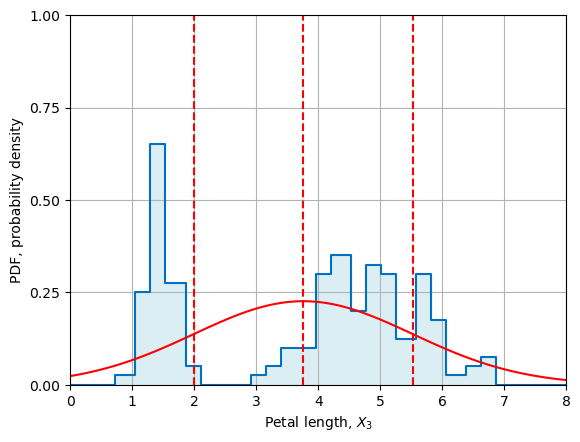

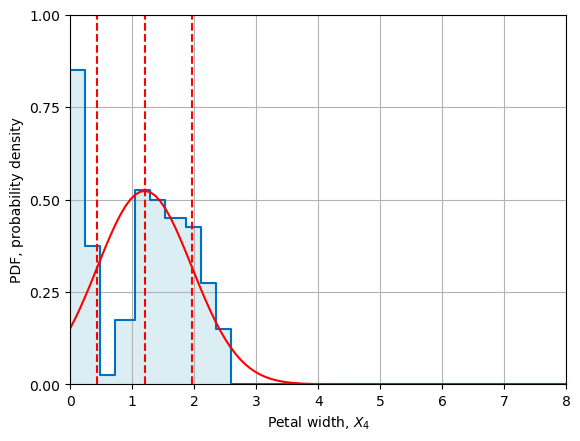

In [6]:
for feature in feature_names:
    sample = X_df[feature]  # 提取特征列数据
    hist = np.histogram(sample, bins=30, range=(0, 8))  # 计算直方图
    hist_dist = scipy.stats.rv_histogram(hist)  # 创建直方图分布对象
    
    mu = sample.mean()  # 计算均值
    std = sample.std()  # 计算标准差
    
    N_pdf = norm.pdf(x_array, loc=mu, scale=std)  # 计算正态分布 PDF
    epdf_y = hist_dist.pdf(x_array)  # 计算经验 PDF
    
    fig, ax = plt.subplots()
    
    plt.step(x_array, epdf_y, color='#0070C0')  # 绘制经验 PDF
    ax.fill_between(x_array, epdf_y, step="pre", color='#DBEEF3')  # 填充区域
    
    plt.axvline(x=mu, color='r', linestyle='--')  # 绘制均值线
    plt.axvline(x=mu + std, color='r', linestyle='--')  # 绘制上标准差线
    plt.axvline(x=mu - std, color='r', linestyle='--')  # 绘制下标准差线
    
    plt.plot(x_array, N_pdf, 'r')  # 绘制正态分布 PDF
    plt.xlabel(feature)  # 设置 x 轴标签
    plt.ylabel('PDF, probability density')  # 设置 y 轴标签
    plt.xlim(0, 8)  # 设置 x 轴范围
    plt.ylim(0, 1)  # 设置 y 轴范围
    plt.yticks(np.linspace(0, 1, 5))
    plt.grid(color=[0.7, 0.7, 0.7])

## 比较 CDF 曲线

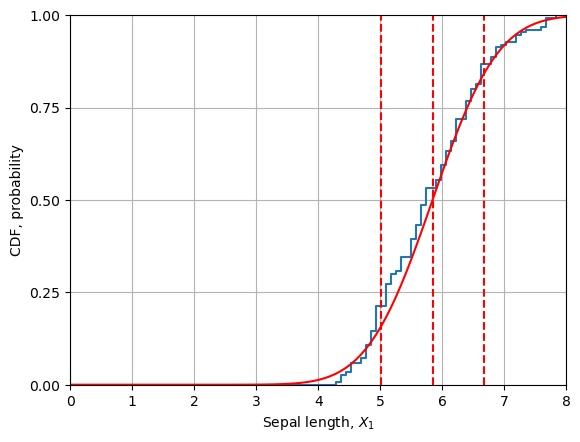

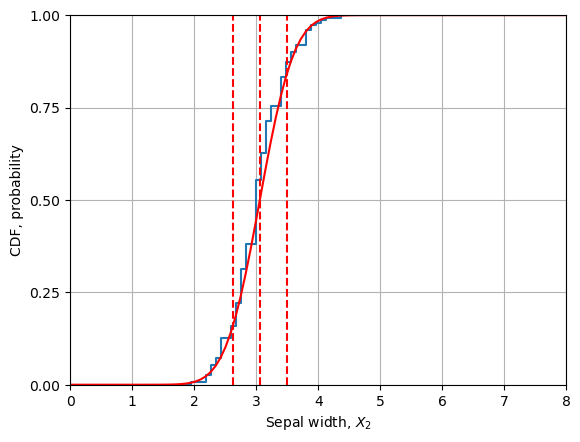

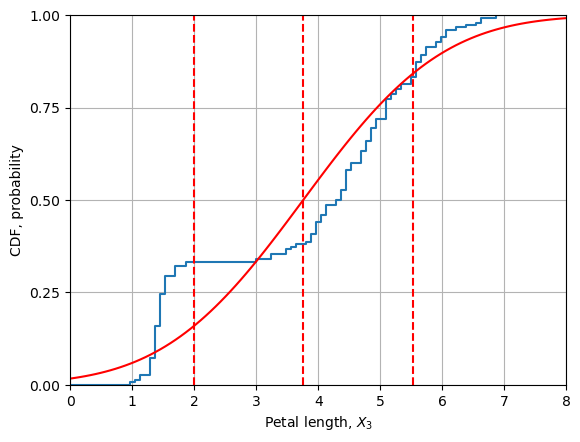

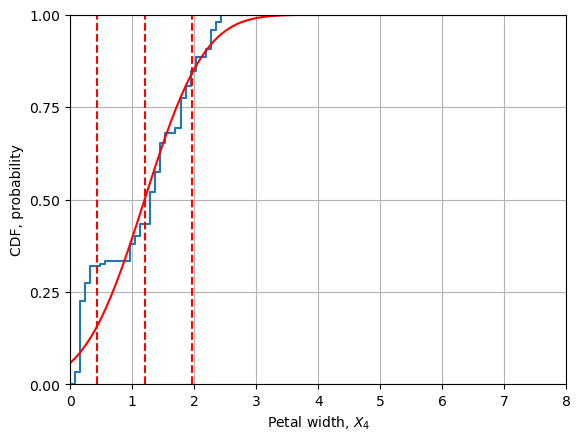

In [7]:
for feature in feature_names:
    sample = X_df[feature]  # 提取特征列数据
    
    mu = sample.mean()  # 计算均值
    std = sample.std()  # 计算标准差
    
    N_cdf = norm.cdf(x_array, loc=mu, scale=std)  # 计算正态分布 CDF
    ecdf = ECDF(sample)  # 计算经验 CDF
    ecdf_y = ecdf(x_array)  # 计算经验 CDF 值
    
    fig, ax = plt.subplots()
    
    plt.step(x_array, ecdf_y)  # 绘制经验 CDF
    plt.plot(x_array, N_cdf, 'r')  # 绘制正态分布 CDF
    
    plt.axvline(x=mu, color='r', linestyle='--')  # 绘制均值线
    plt.axvline(x=mu + std, color='r', linestyle='--')  # 绘制上标准差线
    plt.axvline(x=mu - std, color='r', linestyle='--')  # 绘制下标准差线
    
    plt.xlabel(feature)  # 设置 x 轴标签
    plt.ylabel('CDF, probability')  # 设置 y 轴标签
    plt.xlim(0, 8)  # 设置 x 轴范围
    plt.ylim(0, 1)  # 设置 y 轴范围
    plt.yticks(np.linspace(0, 1, 5))
    plt.grid(color=[0.7, 0.7, 0.7])

## 转换 CDF 散点数据，生成 Copula 图

In [8]:
import seaborn as sns 
iris_sns = sns.load_dataset("iris")  # 加载 Iris 数据集

iris_CDF_df = pd.DataFrame()  # 创建存储 CDF 数据的 DataFrame

for index in np.arange(0, 4):
    feature = iris_sns.columns[int(index)]  # 提取特征名称
    sample = iris_sns[feature]  # 提取样本数据
    
    hist = np.histogram(sample, bins=1000, range=(0, 8))  # 计算直方图
    hist_dist = scipy.stats.rv_histogram(hist)  # 创建直方图分布对象
    ecdf_y = hist_dist.cdf(sample)  # 计算经验 CDF 值
    
    iris_CDF_df[feature] = np.array(ecdf_y)  # 存储 CDF 数据

In [9]:
iris_CDF_df['species'] = iris_sns['species']  # 添加类别信息

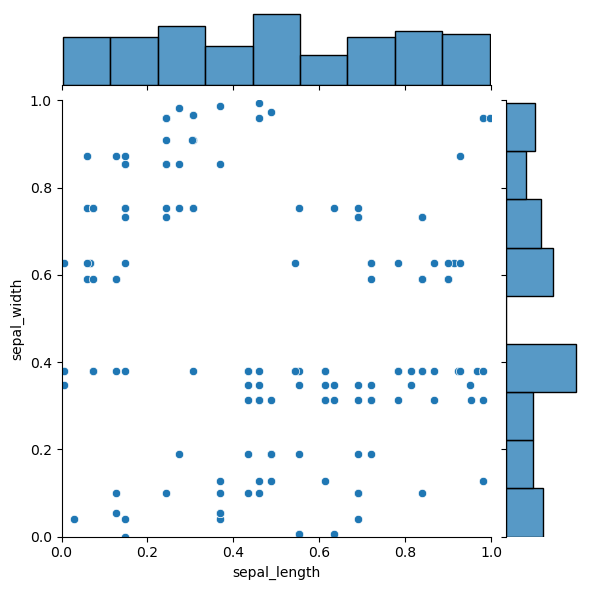

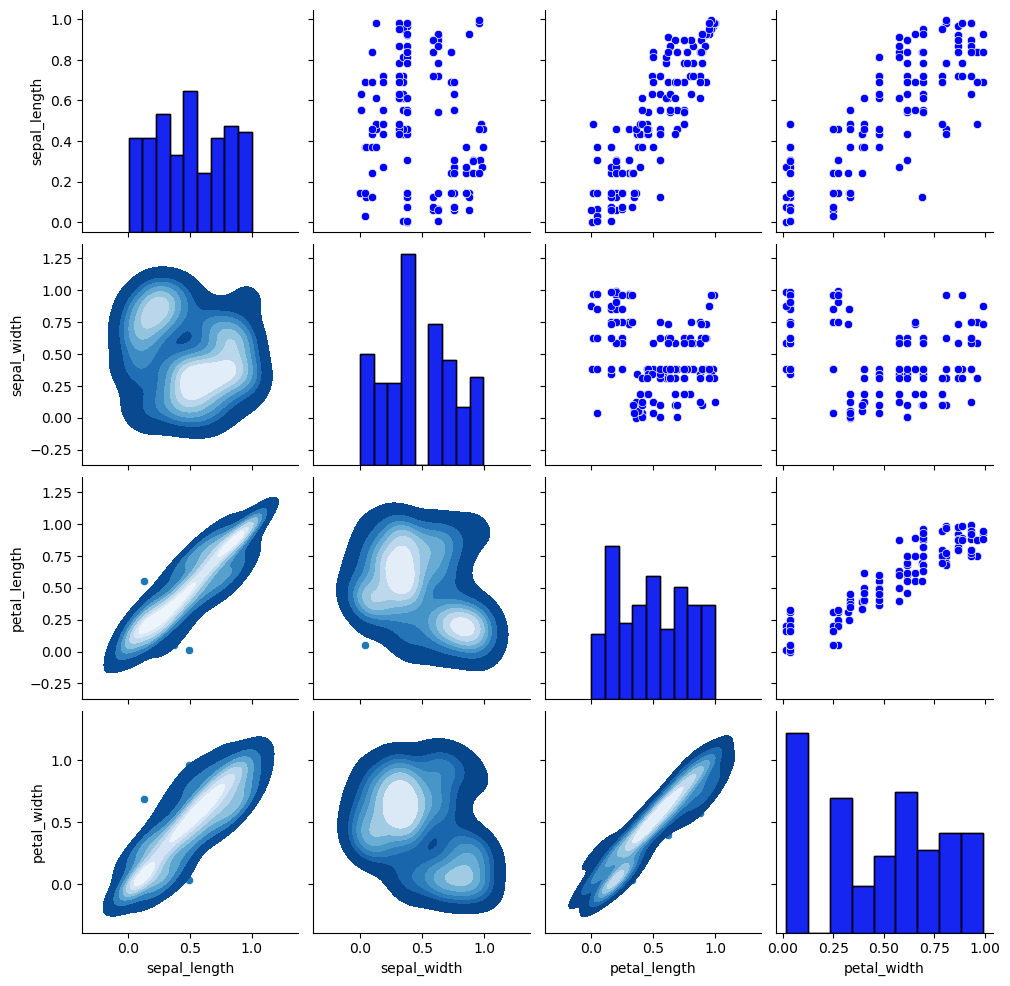

In [10]:
g = sns.jointplot(data=iris_CDF_df, x='sepal_length', y='sepal_width', xlim=(0, 1), ylim=(0, 1))  # 创建联合分布图
g = sns.pairplot(iris_CDF_df)  # 创建特征散点图矩阵
g.map_upper(sns.scatterplot, color='b')  # 设置上三角散点图
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_r")  # 设置下三角核密度图
g.map_diag(sns.histplot, kde=False, color='b')  # 设置对角线直方图

## 比较 ICDF 曲线

In [11]:
cdf_array = np.linspace(0.001, 0.999, 100)  # 创建 CDF 数组

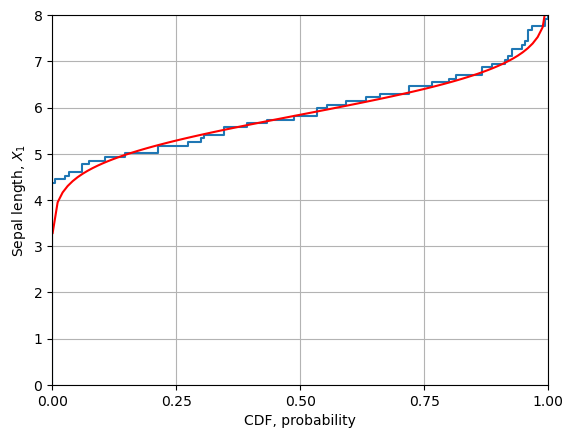

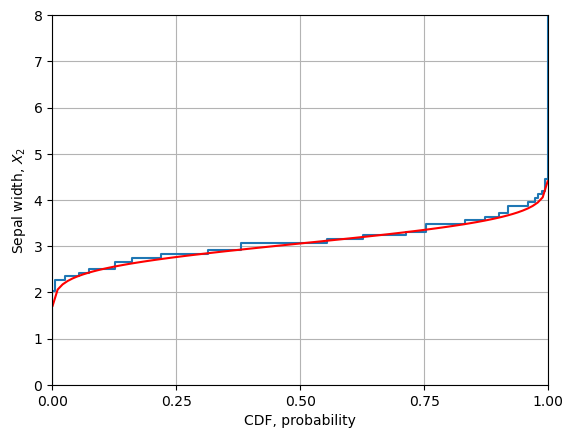

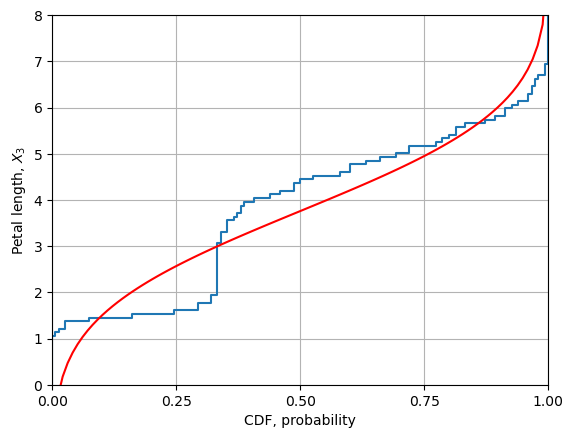

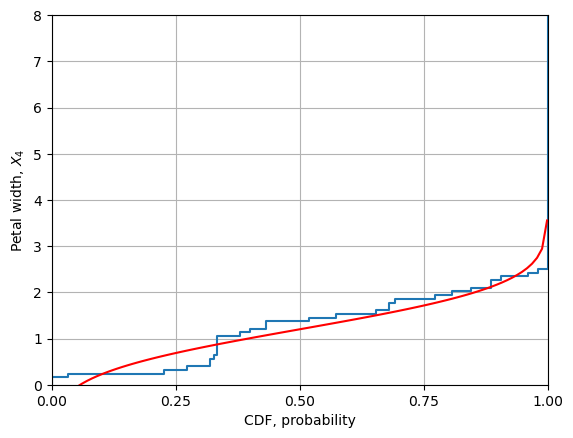

In [12]:
for feature in feature_names:
    sample = X_df[feature]  # 提取特征列数据
    
    mu = sample.mean()  # 计算均值
    std = sample.std()  # 计算标准差
    
    x_icdf = norm.ppf(cdf_array, loc=mu, scale=std)  # 计算正态分布 ICDF
    
    ecdf = ECDF(sample)  # 计算经验 CDF
    ecdf_y = ecdf(x_array)  # 计算经验 CDF 值
    
    fig, ax = plt.subplots()
    
    plt.step(ecdf_y, x_array)  # 绘制经验 ICDF
    plt.plot(cdf_array, x_icdf, 'r')  # 绘制正态分布 ICDF
    
    plt.ylabel(feature)  # 设置 y 轴标签
    plt.xlabel('CDF, probability')  # 设置 x 轴标签
    plt.ylim(0, 8)  # 设置 y 轴范围
    plt.xlim(0, 1)  # 设置 x 轴范围
    plt.xticks(np.linspace(0, 1, 5))
    plt.grid(color=[0.7, 0.7, 0.7])

## 绘制 QQ 图

In [13]:
import pylab 
import scipy.stats as stats

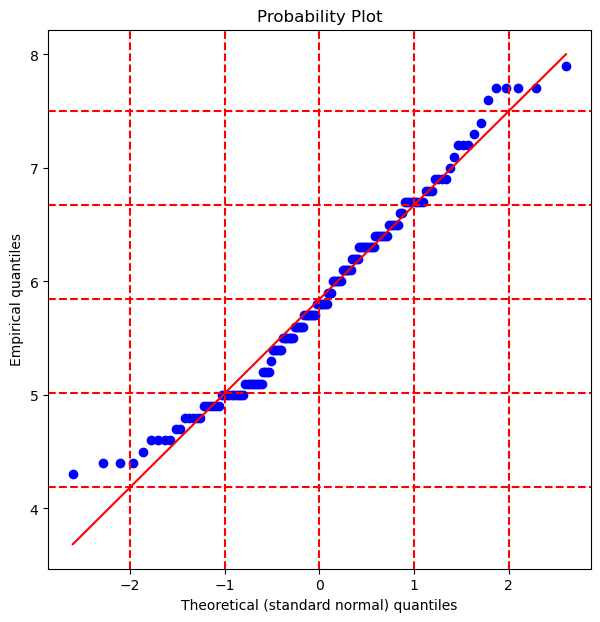

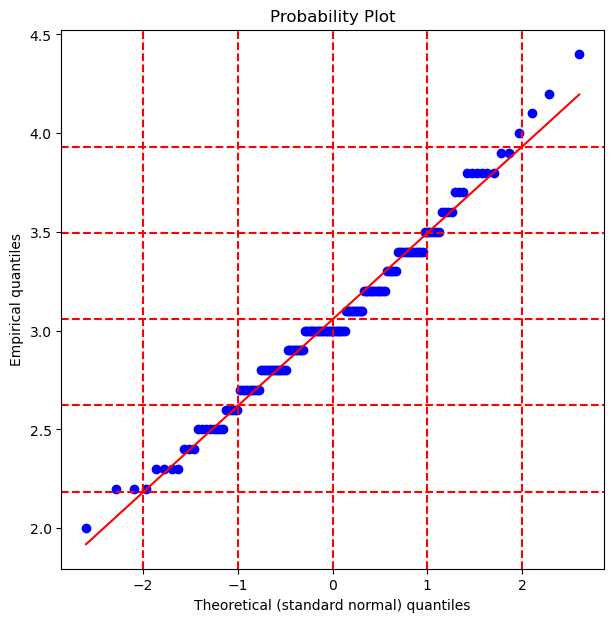

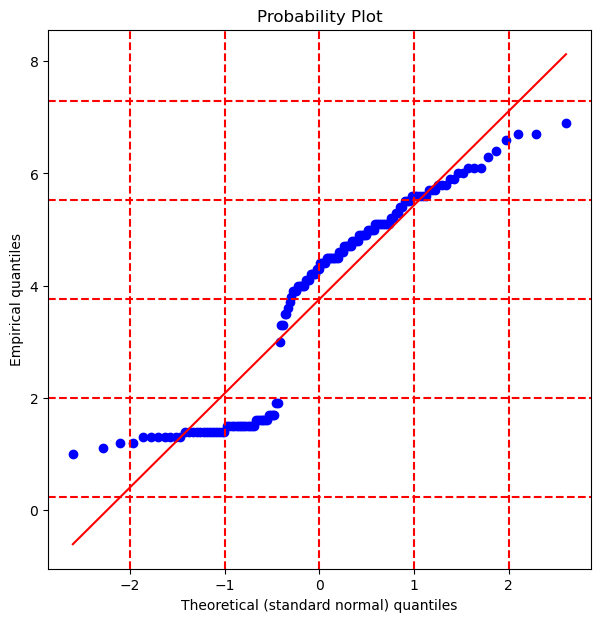

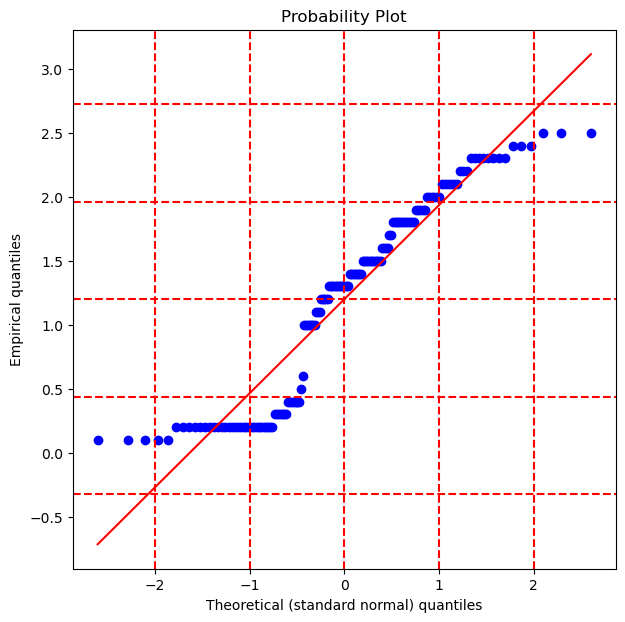

In [14]:
for feature in feature_names:
    sample = X_df[feature]  # 提取特征列数据
    mu = sample.mean()  # 计算均值
    std = sample.std()  # 计算标准差
    
    fig = plt.figure(figsize=(7, 7))
    
    stats.probplot(sample, dist="norm", plot=pylab)  # 绘制 Q-Q 图
    
    
    plt.axhline(y=mu, color='r', linestyle='--')  # 绘制均值线
    plt.axhline(y=mu + std, color='r', linestyle='--')  # 绘制上下 1 标准差线
    plt.axhline(y=mu - std, color='r', linestyle='--')
    plt.axhline(y=mu + 2 * std, color='r', linestyle='--')  # 绘制上下 2 标准差线
    plt.axhline(y=mu - 2 * std, color='r', linestyle='--')
    
    plt.axvline(x=0, color='r', linestyle='--')
    plt.axvline(x=1, color='r', linestyle='--')
    plt.axvline(x=-1, color='r', linestyle='--')
    plt.axvline(x=2, color='r', linestyle='--')
    plt.axvline(x=-2, color='r', linestyle='--')
    
    plt.xlabel('Theoretical (standard normal) quantiles')
    plt.ylabel('Empirical quantiles')
    pylab.show()

## 生成 Z 分数

In [15]:
z_array = np.linspace(-4, 4, 100)  # 创建 z 数组

In [16]:
Z_score_df = (X_df - X_df.mean()) / X_df.std()  # 标准化数据

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\james\AppData\Local\Temp\ipykernel_5064\2041827691.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel(feature.replace('X', 'Z') + ' ($\sigma$)')  # 设置 x 轴标签


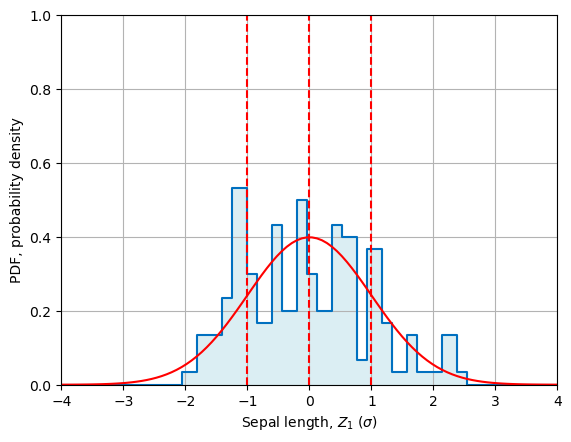

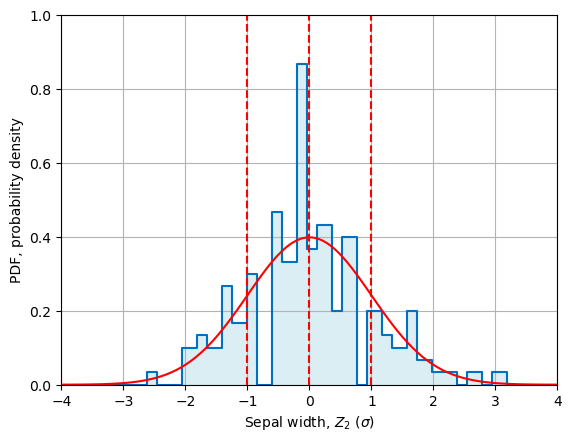

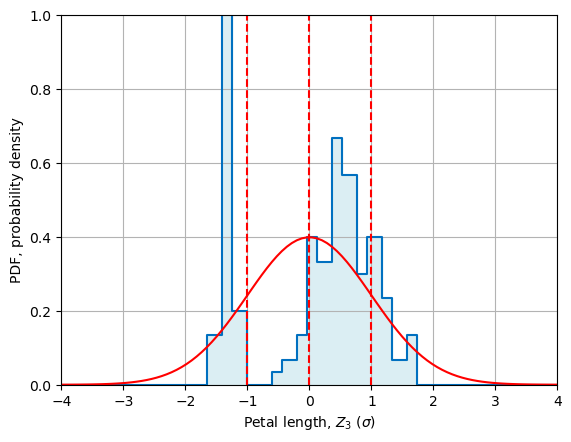

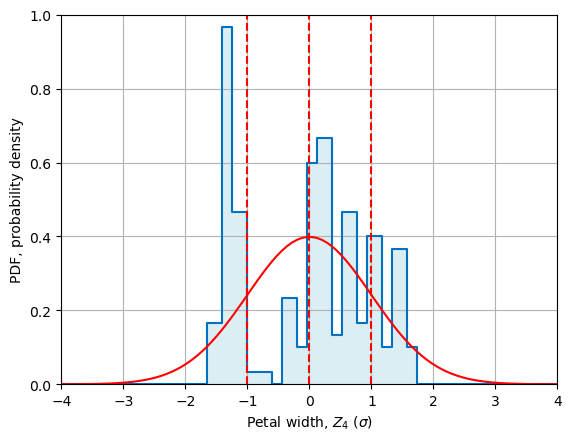

In [17]:
for feature in feature_names:
    sample = Z_score_df[feature]  # 提取标准化特征列数据
    
    hist = np.histogram(sample, bins=40, range=(-4, 4))  # 计算直方图
    hist_dist = scipy.stats.rv_histogram(hist)  # 创建直方图分布对象
    
    mu = sample.mean()  # 计算均值
    std = sample.std()  # 计算标准差
    
    N_pdf = norm.pdf(z_array, loc=mu, scale=std)  # 计算正态分布 PDF
    epdf_y = hist_dist.pdf(z_array)  # 计算经验 PDF
    
    fig, ax = plt.subplots()
    
    plt.step(z_array, epdf_y, color='#0070C0')  # 绘制经验 PDF
    ax.fill_between(z_array, epdf_y, step="pre", color='#DBEEF3')  # 填充区域
    
    plt.axvline(x=mu, color='r', linestyle='--')  # 绘制均值线
    plt.axvline(x=mu + std, color='r', linestyle='--')  # 绘制上标准差线
    plt.axvline(x=mu - std, color='r', linestyle='--')  # 绘制下标准差线
    
    plt.plot(z_array, N_pdf, 'r')  # 绘制正态分布 PDF
    plt.xlabel(feature.replace('X', 'Z') + ' ($\sigma$)')  # 设置 x 轴标签
    plt.ylabel('PDF, probability density')  # 设置 y 轴标签
    plt.xlim(-4, 4)  # 设置 x 轴范围
    plt.ylim(0, 1)  # 设置 y 轴范围
    plt.yticks(np.linspace(0, 1, 6))
    plt.grid(color=[0.7, 0.7, 0.7])